<a href="https://colab.research.google.com/github/anwangari/Introduction-to-Machine-Learning-with-Example/blob/main/Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

## Prepare Data

### Ingest Data

This is the process of ingesting data for analysis



In [2]:
# Use pandas to read data as a dataframe
df = pd.read_csv('housing_price_dataset.csv')

print(f"Shape: {df.shape} \n")
df.info()

Shape: (50000, 6) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


This dataset is clean and complete as observed.
All columns have 50,000 non-null values and the data types correspond to the expected types

In [3]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


### Exploratory Data Analysis

Use 'describe()' to get a summary of the dataset.

In [7]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,49978.000000,49978.000000,49978.000000,49978.000000,49978.000000
mean,2006.752551,3.498659,1.995458,1985.404338,224931.667960
std,575.350298,1.116325,0.815859,20.718407,75995.682992
min,1000.000000,2.000000,1.000000,1950.000000,154.779120
25%,1514.000000,3.000000,1.000000,1967.000000,170007.487130
50%,2008.000000,3.000000,2.000000,1985.000000,225100.123857
75%,2506.000000,4.000000,3.000000,2003.000000,279395.826288
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


From here we immediatelly see that the dataset has outlier values in the Price column. [A house cannot cost USD -36588.17].

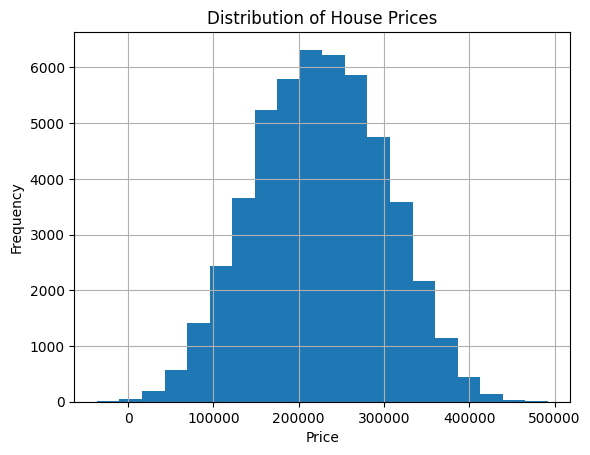

In [5]:
# Plot histogram to visualize distribution of "Price"
df["Price"].hist(bins=20)

# Add labels and a title
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices");

Since the data has nornal distribution, we only need to trim the data where Price is a positive number.

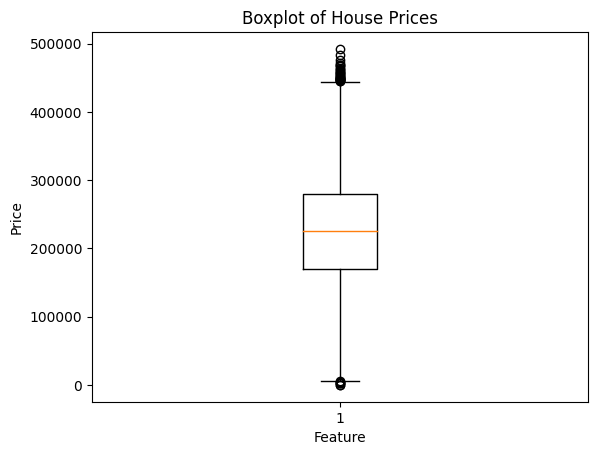

In [6]:
df = df[df["Price"] > 0]

# Plot a boxplot of the Price column
plt.boxplot(df["Price"])

# Add labels and a title
plt.xlabel("Feature")
plt.ylabel("Price")
plt.title("Boxplot of House Prices");

Now that the data still shows outliers. we go ahead and trim the data on the 95th percentile

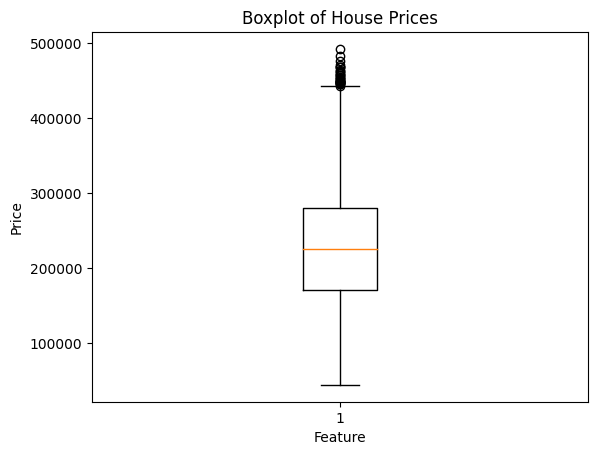

In [8]:
# define percentiles where you want to trim data
lower_bound = df["Price"].quantile(0.005) # @ 0.5%
upper_bound = df["Price"].quantile(0.995)

# Make a subset of the trimmed dataframe
df = df[(df["Price"] >= lower_bound)]

# Plot a boxplot of the Price column
plt.boxplot(df["Price"])

# Add labels and a title
plt.xlabel("Feature")
plt.ylabel("Price")
plt.title("Boxplot of House Prices");

In [9]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,49728.000000,49728.000000,49728.000000,49728.000000,49728.000000
mean,2010.859455,3.500543,1.995817,1985.396417,225911.937021
std,573.733434,1.116173,0.815853,20.718703,74910.919391
min,1000.000000,2.000000,1.000000,1950.000000,44328.569646
25%,1520.000000,3.000000,1.000000,1967.000000,170839.645663
50%,2013.000000,3.000000,2.000000,1985.000000,225568.377192
75%,2508.000000,4.000000,3.000000,2003.000000,279762.550031
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


Check Unique Values of "Neighborhood"

In [10]:
# See what unique neigbourhood are
neighbourhood_unique = df["Neighborhood"].unique()
print(f"Unique Neighbourhoods are: {neighbourhood_unique}")

Unique Neighbourhoods are: ['Rural' 'Suburb' 'Urban']


In [11]:
# Check distribution of "Neighborhood"
df["Neighborhood"].value_counts(normalize=True)

,proportion
Neighborhood,
Suburb,0.334459
Rural,0.333595
Urban,0.331946


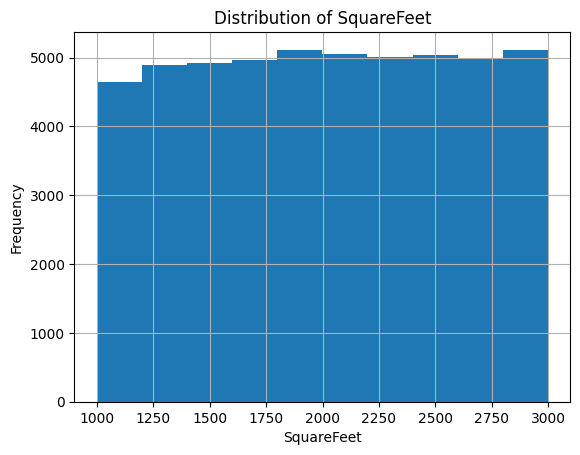

In [12]:
# Histogram for SquareFeet
df["SquareFeet"].hist()

# Add labels and a title
plt.xlabel("SquareFeet")
plt.ylabel("Frequency")
plt.title("Distribution of SquareFeet");

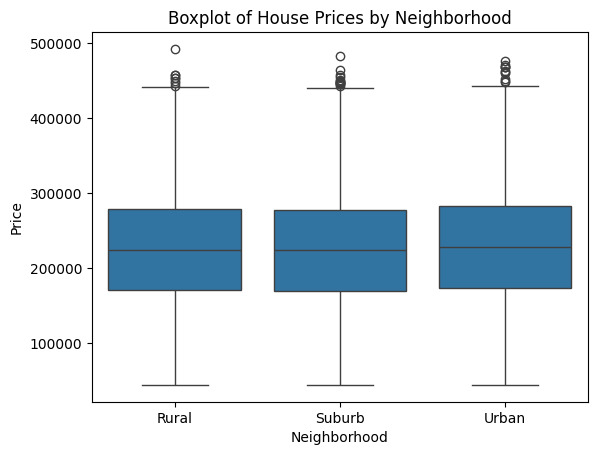

In [13]:
# Plot price by neighbourhood
sns.boxplot(x="Neighborhood", y="Price", data=df)

# Add labels and a title
plt.xlabel("Neighborhood")
plt.ylabel("Price")
plt.title("Boxplot of House Prices by Neighborhood");

In [23]:
df_rural = df[df["Neighborhood"] == "Rural"]
df_rural.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
7,2044,4,3,Rural,1957,184992.321268
16,2123,5,2,Rural,1956,190773.148563
19,1130,4,3,Rural,1962,143050.201782


            SquareFeet  Bedrooms  Bathrooms  YearBuilt
SquareFeet    1.000000 -0.005071  -0.003997   0.001032
Bedrooms     -0.005071  1.000000   0.007445   0.002914
Bathrooms    -0.003997  0.007445   1.000000   0.003780
YearBuilt     0.001032  0.002914   0.003780   1.000000


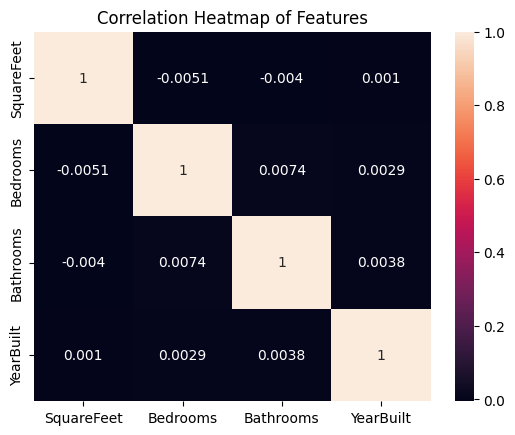

In [16]:
# Correlation Heatmap of Features
# Select numeric columns
numeric_df = df.select_dtypes(include=[int, float]).drop(columns="Price")

# Calculate correlation matrix
corr = numeric_df.corr()
print(corr)

# Plot heatmap
sns.heatmap(corr, annot=True)

# Add a title
plt.title("Correlation Heatmap of Features");

None of the features are highly correlated with each other, which suggests that multicollinearity is not a significant concern.

## Build Model
Here, we consider the most useful features for our task. In this case we want to include only SquareFeet to make a baseline model with. A **baseline model** is useful as it serves as a point of comparison for more complex models which we can build later using all other significant features.

A **baseline model** is useful as it serves as a point of comparison for more complex models which we can build later using all other significant features.

#### Split the Data

In [18]:
# split data into Feature Matrix (X) and Target Vector (y)
X = df[["SquareFeet"]]
y = df["Price"]
print(X.shape)
print(y.shape)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

(49728, 1)
(49728,)
X_train shape: (39782, 1)
y_train shape: (39782,)
X_test shape: (9946, 1)
y_test shape: (9946,)


### Baseline

In [19]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
baseline_mae = mean_absolute_error(y_train, y_pred_baseline)

print("Baseline MAE:", baseline_mae.round(2))

Baseline MAE: 61389.65


### Iterate

In [20]:
import time

# Initialize the linear regression model
model = LinearRegression()

start_time = time.time()

# Fit Model
model.fit(X_train, y_train)

end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

print(f"Training time: {int(training_time / 60)} minutes and {int(training_time % 60)} seconds")

Training time: 0 minutes and 0 seconds


### Evaluate

In [21]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate using Mean Absolute Error (MAE)
test_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {test_mae.round(2)}')

Test MAE: 39431.36


## Results

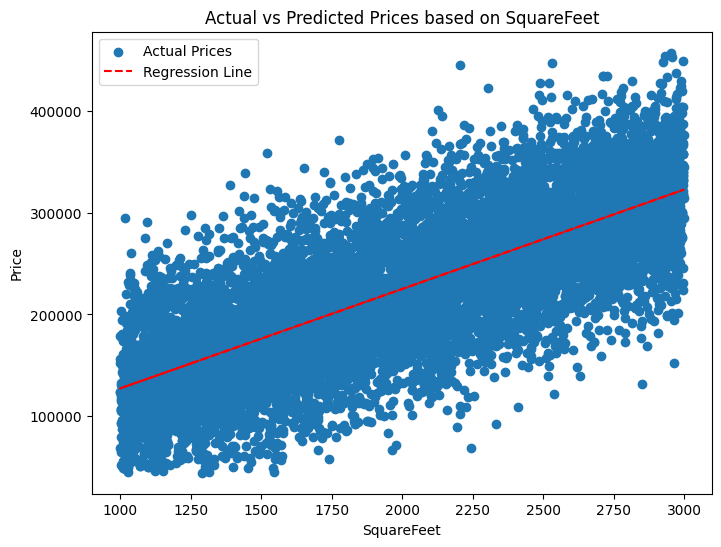

In [22]:
# Plot results including a regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label="Actual Prices")
plt.plot(X_test, y_pred, color="red", linestyle="--", label="Regression Line")
plt.xlabel("SquareFeet")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices based on SquareFeet")
plt.legend();